In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

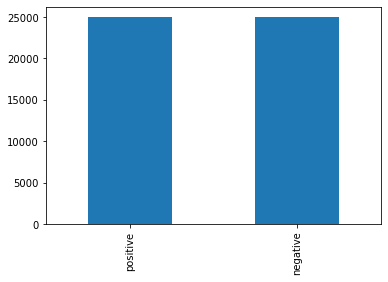

In [8]:
df.sentiment.value_counts().plot.bar();

# Missing Values

In [9]:
df.isnull().sum() # Yay kayıp veri yok

review       0
sentiment    0
dtype: int64

# Duplicates

In [10]:
df.shape

(50000, 2)

In [11]:
df.drop_duplicates(subset="review", keep='first', inplace=True)

In [12]:
df.shape

(49582, 2)

# NLP Pre-Processing

In [13]:
def strip_html(text): # HTML taglerini temizleyen fonksiyon
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [14]:
df["review"] = df["review"].str.lower() # küçük harflere çevirir
df["review"] = df["review"].apply(strip_html) # html taglerini temizler
df["review"] = df["review"].str.replace("[^\w\s]","") # noktalama işaretlerini kaldırır
df["review"] = df["review"].str.replace("\d+","") # rakamları kaldırır(rakamları boşluk ile değiştirir)
df["review"] = df["review"].str.replace("\n"," ").replace("\r","") # satır sonu işaretleri kaldırılır(n yeni satır demek r enter a basılmış demek)

In [15]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [16]:
df["review"][0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

# Stemming

In [17]:
from nltk.stem.snowball import SnowballStemmer

def simple_stemmer(text): # Stemma fonksiyonu
    stemmer = SnowballStemmer('english')
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [18]:
df['lemmatize'] = df["review"].apply(simple_stemmer)

In [19]:
df.lemmatize

0        one of the other review has mention that after...
1        a wonder littl product the film techniqu is ve...
2        i thought this was a wonder way to spend time ...
3        basic there a famili where a littl boy jake th...
4        petter mattei love in the time of money is a v...
                               ...                        
49995    i thought this movi did a down right good job ...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    i am a cathol taught in parochi elementari sch...
49998    im go to have to disagre with the previous com...
49999    no one expect the star trek movi to be high ar...
Name: lemmatize, Length: 49582, dtype: object

In [20]:
df.review

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

# Polarity & Subjectivity

In [21]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["review"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [22]:
df.head(10)

,review,sentiment,lemmatize,polarity,subjectivity
0,one of the other reviewers has mentioned that ...,positive,one of the other review has mention that after...,0.023433,0.490369
1,a wonderful little production the filming tech...,positive,a wonder littl product the film techniqu is ve...,0.111490,0.559343
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonder way to spend time ...,0.346324,0.640769
3,basically theres a family where a little boy j...,negative,basic there a famili where a littl boy jake th...,-0.060937,0.454167
4,petter matteis love in the time of money is a ...,positive,petter mattei love in the time of money is a v...,0.217952,0.452916
5,probably my alltime favorite movie a story of ...,positive,probabl my alltim favorit movi a stori of self...,0.155294,0.570392
6,i sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrect of a up d...,0.285522,0.475196
7,this show was an amazing fresh innovative ide...,negative,this show was an amaz fresh innov idea in the ...,0.082716,0.587654
8,encouraged by the positive comments about this...,negative,encourag by the posit comment about this film ...,-0.142863,0.754147
9,if you like original gut wrenching laughter yo...,positive,if you like origin gut wrench laughter you wil...,0.335000,0.550000


# Tokenization

In [23]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['review'].values]

In [24]:
df.tokenized

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, theres, a, family, where, a, littl...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [im, going, to, have, to, disagree, with, the,...
49999    [no, one, expects, the, star, trek, movies, to...
Name: tokenized, Length: 49582, dtype: object

# Word Cloud

In [25]:
from wordcloud import WordCloud
def wc(data,bgcolor,file_name): #Word Cloud oluşturan fonksiyon
    from PIL import Image
    mask = np.array(Image.open("heart.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure(figsize=(20,10))
    wc.to_file(file_name)
    print('Word Cloud saved successfully')
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [26]:
possitive_sentiment = df[df["sentiment"]=="positive"]["review"]
negative_sentiment = df[df["sentiment"]=="negative"]["review"]

Word Cloud saved successfully


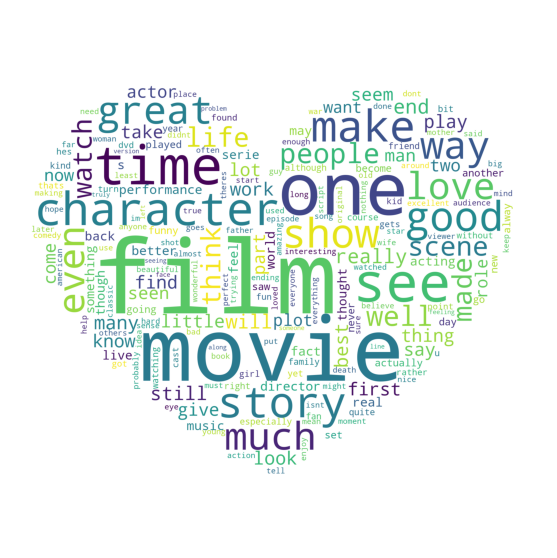

In [27]:
wc(possitive_sentiment,"white","1.png")

Word Cloud saved successfully


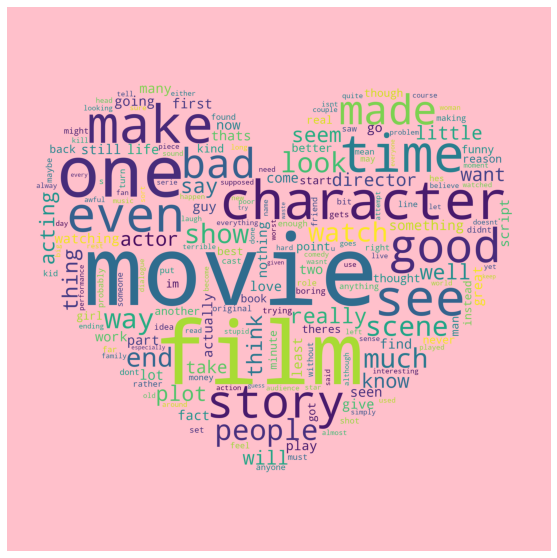

In [28]:
wc(negative_sentiment,"pink","2.png")

# Classification and Modelling

**Splitting into target and value, I mean X and Y**

In [29]:
x,y=df['review'],df['sentiment']

**Splitting into test and train**

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

## Stemma and Modelling Section

In [31]:
from textblob import TextBlob
stemmer = SnowballStemmer('english') 

def split_into_lemmas(text):    # Stemma analiz methodu  
    text = str(text).lower()   
    words = TextBlob(text).words    
    return [stemmer.stem(word) for word in words]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), analyzer=split_into_lemmas)
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [35]:
accuracy_score(y_test,b_predict)

0.8378541897751336

In [38]:
print(classification_report(y_test, b_predict))

              precision    recall  f1-score   support

    negative       0.82      0.87      0.84      4939
    positive       0.86      0.81      0.83      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



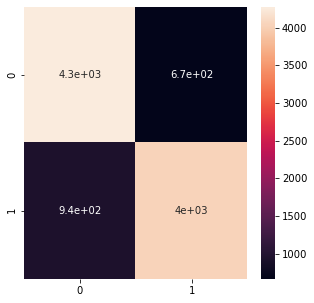

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,b_predict), annot=True);

In [42]:
def vectorizing(text):
    return vect.transform([text])

In [43]:
model.predict(vectorizing('I hate it'))  # Predicting different value for our model.

array(['negative'], dtype='<U8')

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
g=GradientBoostingClassifier()
model=g.fit(x_train_dtm,y_train)
g_predict=g.predict(x_test_dtm)

In [46]:
accuracy_score(y_test,g_predict)

0.8039729756982958

In [47]:
print(classification_report(y_test, g_predict))

              precision    recall  f1-score   support

    negative       0.84      0.75      0.79      4939
    positive       0.77      0.86      0.82      4978

    accuracy                           0.80      9917
   macro avg       0.81      0.80      0.80      9917
weighted avg       0.81      0.80      0.80      9917



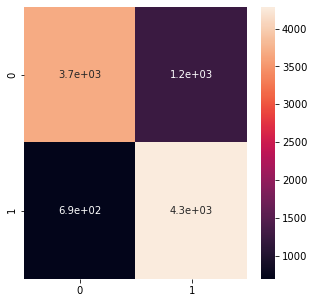

In [48]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,g_predict), annot=True);

In [49]:
model.predict(vectorizing('I hate it'))  # Predicting different value for our model.

array(['negative'], dtype=object)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
l=LogisticRegression()
model=l.fit(x_train_dtm,y_train)
l_predict=l.predict(x_test_dtm)

In [52]:
accuracy_score(y_test,l_predict)

0.8763739033982051

In [53]:
print(classification_report(y_test, l_predict))

              precision    recall  f1-score   support

    negative       0.89      0.86      0.87      4939
    positive       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



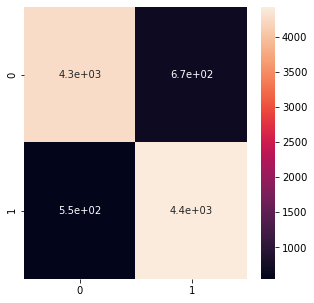

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,l_predict), annot=True);

In [55]:
model.predict(vectorizing('I hate it'))  # Predicting different value for our model.

array(['negative'], dtype=object)

# Saving My Model

In [56]:
vocab = vect.vocabulary_

In [57]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocab, open('Vocab.pkl', 'wb'))